### Simple Linear Regression

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 01. Read the dataset

In [104]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


#### Scatter Plot for Weight & Height

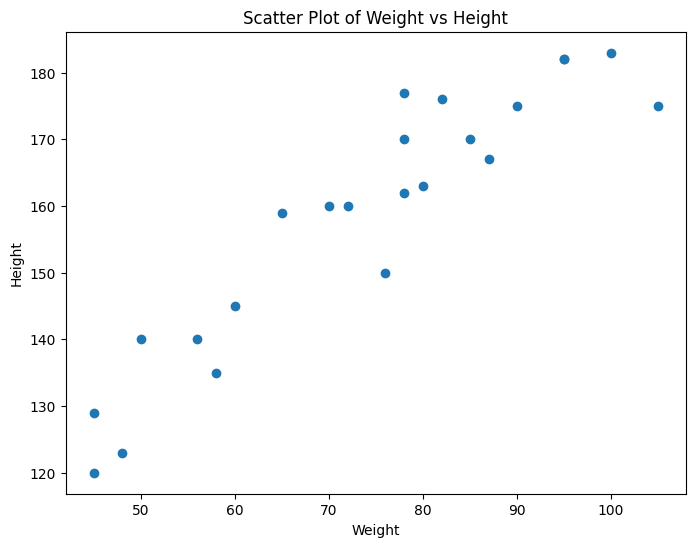

In [105]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Scatter Plot of Weight vs Height")
plt.show()

### 02. Divide our dataset into independent and dependent features

In [106]:
X=df[['Weight']]   #independent feature it should be in DataFrame.
y=df['Height']   #dependent feature it should be in series

### 03. Train test split

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [109]:
X.shape

(23, 1)

In [110]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

### 04. Standardize the dataset Train independent data

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler=StandardScaler()

In [113]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [114]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

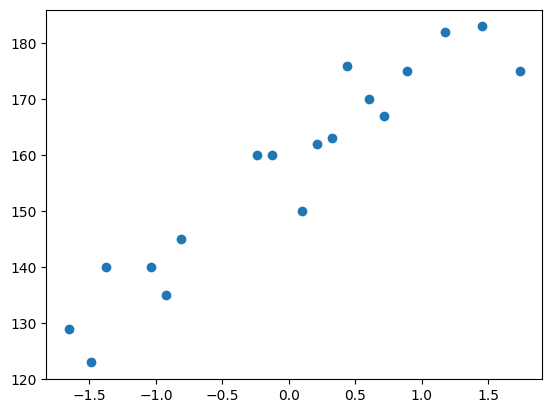

In [115]:
plt.scatter(X_train,y_train)

### 05. Train the Simple Linear Regression Model

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
regressor=LinearRegression()

In [118]:
regressor.fit(X_train,y_train)

LinearRegression()

In [119]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept: 157.5


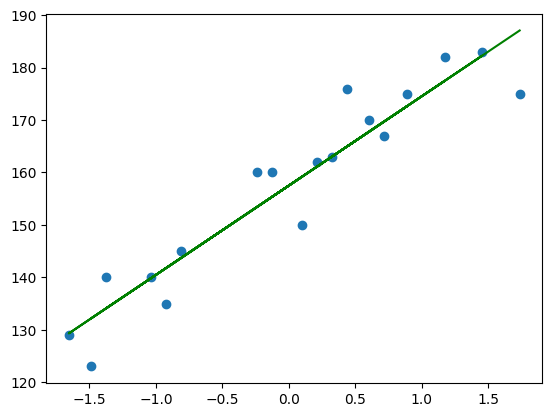

In [120]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'g')
plt.show()

### 06 Prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### 07. Prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [121]:
y_pred_test=regressor.predict(X_test)

In [122]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

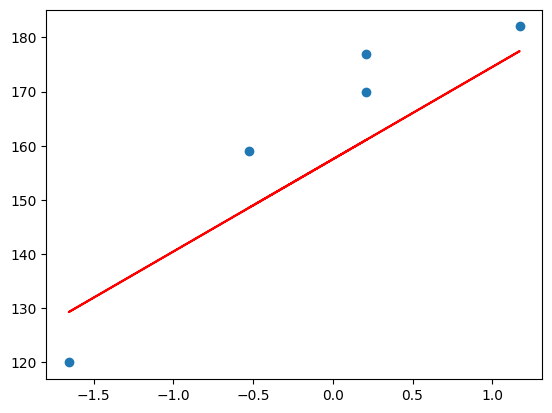

In [123]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

### 08. Performance Metrics

MSE,MAE,RMSE

R square and adjusted R square

In [124]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [125]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


### 09. R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [126]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score

0.776986986042344

### 10. Adjusted R Square

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [127]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [128]:
regressor

LinearRegression()

### 11. New data point weight is 80

In [129]:
scaled_weight=scaler.transform([[80]])
scaled_weight

c:\Users\Arjun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [130]:
scaled_weight[0]

array([0.32350772])

In [131]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


### 12. Assumptions

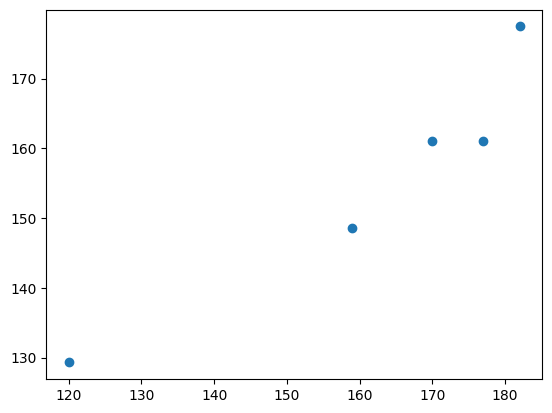

In [132]:
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

### 13. Residuals

In [133]:
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\Arjun\AppData\Local\Temp\ipykernel_8232\314054912.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

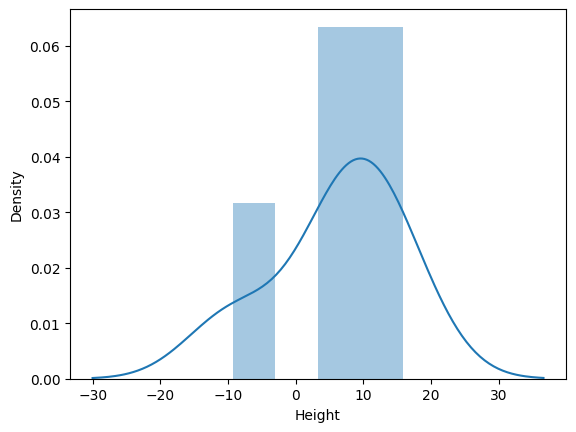

In [134]:
# plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

### 14. Scatter plot with respect to prediction and residuals

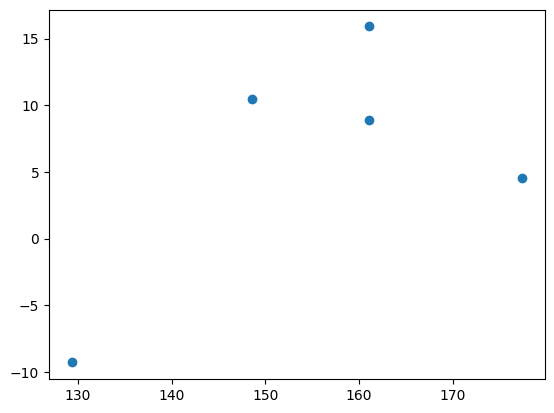

In [135]:
## uniform distribution
plt.scatter(y_pred_test,residuals)